<h1>Classification</h1>

#The following code fetches the MNIST dataset:

Warning: fetch_mldata() is deprecated since Scikit-Learn 0.20. You should use fetch_openml() instead. However, it returns the unsorted MNIST dataset, whereas fetch_mldata() returned the dataset sorted by target (the training set and the test test were sorted separately). In general, this is fine, but if you want to get the exact same results as before, you need to sort the dataset using the following function:

In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [4]:
mnist.data.shape

(70000, 784)

A data key containing an array with one row per instance and one column per feature
A target key containning an array with the labels

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

There are 70000 images and each image has 784 features. This is because each image is 28x28 pixels. and each feature simply represents one pixel's intensity, from 0(white) to 255(black).


Lets show one image. just take an instance's feature vector, reshape it to 28x28 array

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

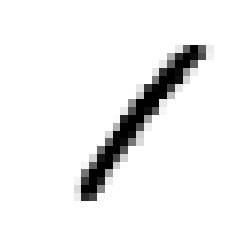

In [8]:
some_digit = X[6000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [9]:
y[6000]

1

The first 60000 image is trainning set and last 10000 images are test set

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Some ML algorithm produce results if similiar entities is in a row in order so lets shuffle

In [11]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

<h1>5-Detector</h1>

Lets simplify the problem. for example classifior only detects is it 5 or not

In [12]:
y_train_5 = (y_train==5)
y_test_5 = (y_test == 5)

Lets take one classifiar and train it
Start with Stochastic Gradient Descent (SGD) classifier

SGD is good at handling very large sets

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter =5,tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
#SGD relies on randomness if you want reproducible results, you should use random_state

In [15]:
sgd_clf.predict([some_digit])

array([False])

In [16]:
#which is true because it was 1

In [17]:
sgd_clf.predict([X[36000]])

array([ True])

In [18]:
y[36000]
#correct again

5

<h1>Performance Evaluation</h1>

Evaluating a classifier more tricker than evaluating a regressor

<h3>Measuring Accuracy Using Cross-Validation</h3>

The following code does the same thing as Sckit-learn's cross_val_score() function does and prints the same results

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    
    print(n_correct/len(y_pred))

0.9502
0.96565
0.96495


In [20]:
#above code is same as cross_val_score() function
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9502 , 0.96565, 0.96495])

95% accuracy is really good. However look the same result a very dumb classifier 

In [21]:
from sklearn.base import BaseEstimator

class Never5classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    


This class only produce all zero which means says false without even looking at the trainning set. Only pass so doing nothing the train the set

In [22]:
never_5_clf = Never5classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.909  , 0.90715, 0.9128 ])

This dump classifier which only says false for all results produce 90% accuracy
This is only because 10% of the images are 5s

This demostrates why accuracy is generally not prefered performance measure for classifiers.(specificly skewed datasets when some classes are much more frequent than others) 

<h3>Confusion Matrix</h3>

Confision matrix is better way to evaluate

The general idea is to count the number of times instances of class A are classified as class B.

For example to find the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix

In [23]:
#First you need to have a set of predictions, so they can be compared with actual results
#Remember that you want to keep test set untouched until you have a succesful classifier

In [24]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
#This is like cross_val_score() but instead it just split to three group and return prediction not evaluation

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

--EACH ROW IN A CONFUSION MATRIX REPRESENTS AN ACTUAL CLASS, WHILE EACH COLUMN REPRESENTS A PREDICTED CLASS

--THE FIRST ROW OF MATRIX IS NON-5 IMAGES(THE NEGATIVE CLASS): 53,272 OF THEM WERE CORRECTLY CLASSIFIED AS NON-5S(TRUE NEGATIVES). WHILE THE REMAINNING 1307 WERE WRONGLY CLASSIFIED AS 5S(FALSE POSITIVES)

--THE SECOND ROW CONSIDERS THE IMAGES OF 5S(THE POSITIVE CLASS):1077 WERE WRONGLY CLASSIFIED AS NON-5S(FALSE NEGATIVES). WHILE THE REMAINNING 4344 WERE CORRECTLY CLASSIFIED AS 5S(TRUE POSITIVES)



#confuscion matrix gives more information but you may prefer more concise metric 

<h3>precision = TP / (TP+FP)</h3>
<h3>recall = TP / (TP + FN) </h3>

<h1> ([TN, FP]</h1>
<h1>  [FN, TP])</h1>

<h1> Precision and Recall </h1>

In [26]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7687135020350381

In [27]:
recall_score(y_train_5, y_train_pred)

0.801328168234643

So, this is a better evaluation than cross_val_score(). 
When it claims an image represents a 5, it is only 77% of the time.
Moreover, it only detects 80% of the 5s. 

<h1>F1 Score</h1>

F1 score is the harmonic mean of precision and recall.
Another number to evaluate the model

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7846820809248555

<h1>Precision/Recall Tradeoff</h1>

Increasing threshold decreases recall and reduces precision. Sklearn does not allow us to set threshold but decision_function does

In [29]:
y_scores =sgd_clf.decision_function([X[36000]])
y_scores

array([161855.74572176])

In [30]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

If threshold increases, this result will be false so increasing threshold decreases recal and increase precision. 

<h3>How can we decide which threshold to use?</h3>

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5, method ="decision_function")

Now with these scores you can compute precision and recall for all possible threshold.

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Now, you can plot precision and recall as functions of the threshold value using Matplotlib

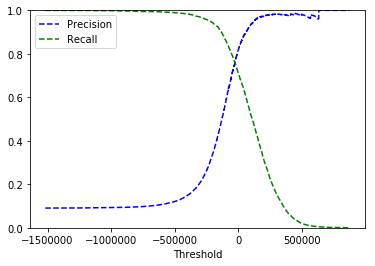

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc= "upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


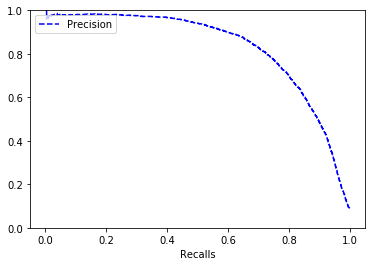

In [34]:
def plot_precision_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b--", label = "Precision")
    plt.xlabel("Recalls")
    plt.legend(loc= "upper left")
    plt.ylim([0,1])
    
plot_precision_recall(precisions, recalls)
plt.show()


IMPORTANT =>Precision really starts to fall sharply around 80% recalls. You would want to select a precision/recall tradeoff just before the drop like around 60% recall.

Lets suppose you aim for 90% precision, your threshold is about 70000.


To make predictions, instead of calling predict() method, just run these code

In [35]:
y_train_pred_90 = (y_scores> 70000)

In [36]:
#Lets check these predictions' precision and recall

precision_score(y_train_5, y_train_pred_90)

0.9089068825910931

In [37]:
recall_score(y_train_5, y_train_pred_90)

0.5797823279837668

As you can see, it is fairly easy to create a classifier with any precision you want
But, a high-precision classifier is not very useful if its recall is too low.

<h1>The ROC Curve</h1>

It draws the graph of recall(tpr) against incorrectly classified as positive(fbr)

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

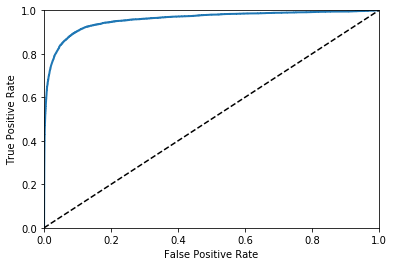

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr,tpr)
plt.show()

There is a tradeoff: the higher the recall(TPR), the more false psotives(FPR) the classifier produces.

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)

One way to compare classifier is to measure the area under the curve(AUC).
A perfect classifer will have a ROC AUC equal to 1, wheares a purely random classifier will have a ROC AUC equal to 0.5

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9580791586156129

AS A RULE OF THUMP, YOU SHOULD PREFER THE PRESICION/RECALL CURVE WHENEVER THE POSITIVE CLASS IS RARE OR WHEN YOU CARE MORE ABOUT THE FALSE POSITIVES THAN THE FALSE NEGATIVES. AND THE ROC CURVE OTHERWISE

FOR EXAMPLE, ROC CURVE IS LOOKING LOOK THIS IS ONLY BEACUSE THERE ARE FEW (5S) IN THE DATA SET. PR( PRESICION/RECALL) CURVE SHOWS THIS CLASSIFICATION NEED MORE IMPROVEMENTS. 

<h1>LETS TRAIN A RANDOMFORESTCLASSIFIER<h1>

In [60]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10,random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [42]:
y_probas_forest

array([[1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

predict_proba() method returns an array containning a row per instance and a column per class, each containning the probability that the given instance belongs to the given class(e.g. 70% chance that the image represents a 5)

But to plot a ROC curve, you need scores, not probalities

A simple solution is to use the positive class's probability as the score:

In [43]:
y_scores_forest = y_probas_forest[:, 1] #score=proba of positive class
y_scores_forest

array([0. , 0.1, 0. , ..., 0. , 0. , 0. ])

In [44]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

<h4>ROC Curve for forestRandomClassifier and sgdClassifer</h4>

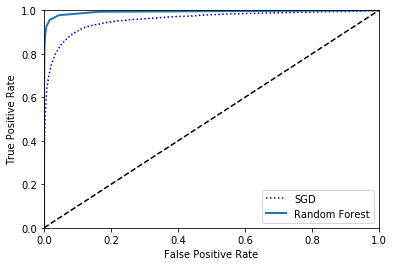

In [45]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

RandomForest Classifier's ROC curve is better than sgdclassifier. So its ROC AUC score is better

In [46]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [47]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

/home/ofdemire/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ofdemire/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ofdemire/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9852973447443494

In [48]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383

Precision and recall scores are not bad

Lets move on finding more than 5s

<h1>MultiClass Classification</h1>

MultiClass classifiers can distinguish between more than two classes. 

#RandomForestCLassifier => binary + multiclass\n
#naive bayes classifier => binary + multiclass
#svm => binary
#linear classifier => binary

However there are strategies that you can use to perform multiclass classification using multiple bianry classifaction

In [49]:
sgd_clf.fit(X_train, y_train) # not y_train_5

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
sgd_clf.predict([X[6000]])

array([1], dtype=int8)

In [51]:
sgd_clf.predict([X[36000]])

array([5], dtype=int8)

Under the hood, Scikit-learn actually trained 10 binary classifiers. got their decision scores for the image, and selected the class with the highest score.

In [52]:
some_digit_scores = sgd_clf.decision_function([X[6000]])

In [53]:
#decision_function() shows these 10 numbers predict chooses the highest one's index.  
some_digit_scores

array([[-345398.15776865,  219829.27241121, -184826.36910666,
         -81324.41122456, -236042.5411204 , -251086.25740779,
        -360660.11072728, -472478.18125706,    5304.71599878,
        -326884.80609119]])

In [54]:
np.argmax(some_digit_scores)

1

In [57]:
#if you want to force classifier to use one-versus-one because its deault is OvA
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([X[36000]])


array([5], dtype=int8)

In [58]:
len(ovo_clf.estimators_)

45

In [63]:
#RandomForestClassifier, we dont need OvA or OvO because it can handle
forest_clf.fit(X_train, y_train)
forest_clf.predict([X[6000]])

array([1], dtype=int8)

In [65]:
forest_clf.predict_proba([X[6000]])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [66]:
forest_clf.predict_proba([X[36000]])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [67]:
#predict_proba() shows the predictions for each entry

In [68]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
#It return three results because it splits into three groups

array([0.84063187, 0.84899245, 0.86652998])

However simply scaling inputs will increase the accuracy over 90%

In [69]:
X_train.astype(np.float64)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train.astype(np.float64))

In [71]:
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91011798, 0.90874544, 0.906636  ])

<h1>Error Analysis</h1>

In [83]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [73]:
#In this chapter, we will assume you have already find the best method and you want to find ways to improve it.

One way for analysis is confusion_matrix as like we did for binary

In [74]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)


In [75]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

In [76]:
#It is often more convenient to look at an image represion of the confusion matrix

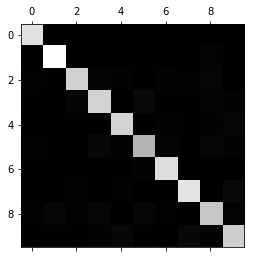

In [77]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks fairly good, since most images are on the main diagonal which means that they were classified correctly.

5 is darker than other so there could be less 5 in the datasets or, model does not perform well 5 as much as others.

<h3>Lets focus to plot errors</h3>

In [78]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

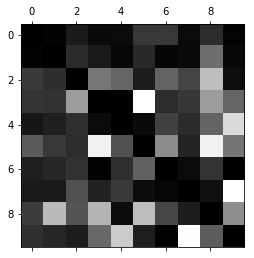

In [79]:
#now lets fill the diagonal with zeros to keep only the errors, lets plot the results.
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Brighter classes have more frequently predicted  wrongly

8 and 9 are often confused with other digits

However, 1 is really black so it is corecly classified

Analyzing the confusion matrix can often give you insights on ways to improve your classifier.By looking at this plot, 8/9 and 3/5 are confused so they should be improved.

Feature engineering would work for example, writing algortim to count the number of closed loops(8 has two, 6 has one, 5 has 0)

Analyzing individual errors would help too.

Lets plot some fond solution and compare error and correct solutions

In [81]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train==cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred == cl_b)]

X_ba = X_train[(y_train==cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred == cl_b)]               

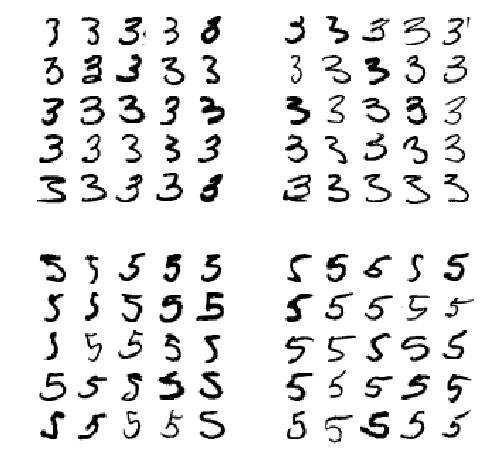

In [84]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()


So algorithm made some obvious mistakes because we use SDGClassifier, it only sums up the weighted pixel intensities to get a score for each class.